In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skpp
# XGBoost
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn
import xgboost as xgb # must be in AMN_windows env
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple, List


PATH = "biolog_iML1515_AMN.csv"

all_data = pd.read_csv(PATH, index_col=0)
all_data

,EX_nh4_e_i,EX_pi_e_i,EX_co2_e_i,EX_fe3_e_i,EX_h_e_i,EX_mn2_e_i,EX_fe2_e_i,EX_zn2_e_i,EX_mg2_e_i,EX_ca2_e_i,...,b4105,b4106,b4111,b4117,b4119,b4120,b4129,b4138,b4173,GR_AVG
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7800
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4300
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0400
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0900
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.8300
17876,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.1225
17877,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.8400
17878,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.9300


<AxesSubplot:xlabel='GR_AVG', ylabel='Count'>

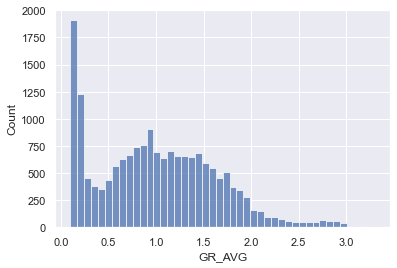

In [2]:
plt.close('all')
sns.set_theme()
sns.histplot(all_data["GR_AVG"])

In [4]:
X = all_data.iloc[:,:-1].values

Y = all_data["GR_AVG"].values.reshape(-1, 1)
print(X.shape, Y.shape)

(17880, 275) (17880, 1)


In [5]:
LOO_split = int(Y.shape[0])

xgb_preds = []

for i in range(1):

    # XGBoost = xgb.XGBRegressor(n_estimators=600, max_depth=2, learning_rate=0.01, objective='reg:squarederror', random_state=i)

    multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror'))
    
    xgb_pred = cvp(multioutputregressor, X, Y, cv=KFold(n_splits=10, shuffle=True, random_state=i), n_jobs=10)
    
    xgb_preds.append(xgb_pred)

In [6]:
xgb_preds

[array([[0.9945661],
        [1.0112913],
        [1.0099955],
        ...,
        [1.245257 ],
        [1.1280543],
        [1.145666 ]], dtype=float32)]

In [7]:
mean_xgb_pred = np.array(xgb_preds).mean(axis=0)
std_xgb = np.array(xgb_preds).std(axis=0)

print("Mean squared error between mean prediction and true fluxes", np.mean((mean_xgb_pred - Y)**2, axis=0))
# MSE between mean prediction (over 5 times 10-fold test sets) and true

print("Q²: ", r2_score(Y, mean_xgb_pred))

Mean squared error between mean prediction and true fluxes [0.10814372]
Q²:  0.7322766577061823


<AxesSubplot:ylabel='Count'>

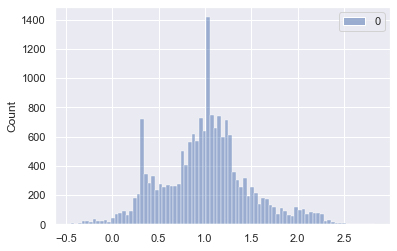

In [8]:
sns.histplot(mean_xgb_pred)